# Explore time plots

Check different plot alternatives to be able to analyze and present the results of time-domain experiments.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [65]:
# Create some mock data
x = np.linspace(0, 2 * np.pi, 100)
t = np.linspace(0, np.pi, 10)
X, T = np.meshgrid(x, t)
Y = np.sin(X - T)  # structure is like (t_id, x_id)

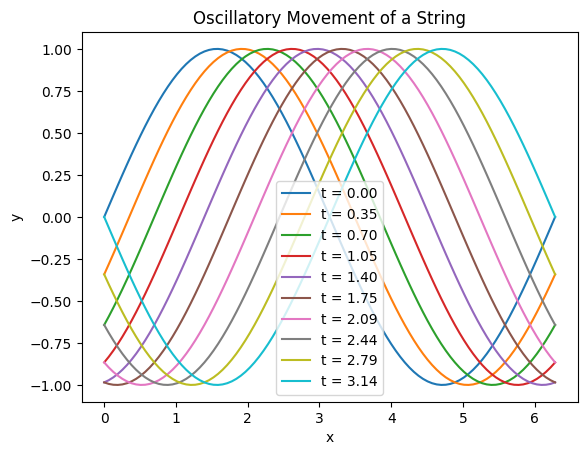

In [66]:
# Verify the mock data

for i in range(0, 10):
    plt.plot(x, Y[i, :], label=f"t = {t[i]:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Oscillatory Movement of a String")
plt.legend()
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


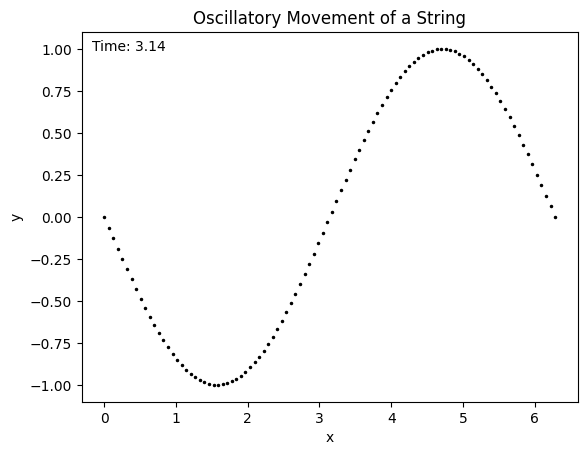

In [67]:
# 1. Make an animation and save it as gif
def plot_oscillatory_movement(x, t, Y, xlabel, ylabel, title, savepath):
    fig, ax = plt.subplots()
    (line,) = ax.plot(x, Y[0], "k.", markersize=3)
    time_text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

    def update(frame):
        line.set_ydata(Y[frame, :])
        time_text.set_text(f"Time: {t[frame]:.2f}")
        return line, time_text

    ani = FuncAnimation(fig, update, frames=len(t), blit=True, interval=50)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    ani.save(savepath, fps=1)


plot_oscillatory_movement(
    x,
    t,
    Y,
    "x",
    "y",
    "Oscillatory Movement of a String",
    "../data/images/oscillatory_movement.gif",
)

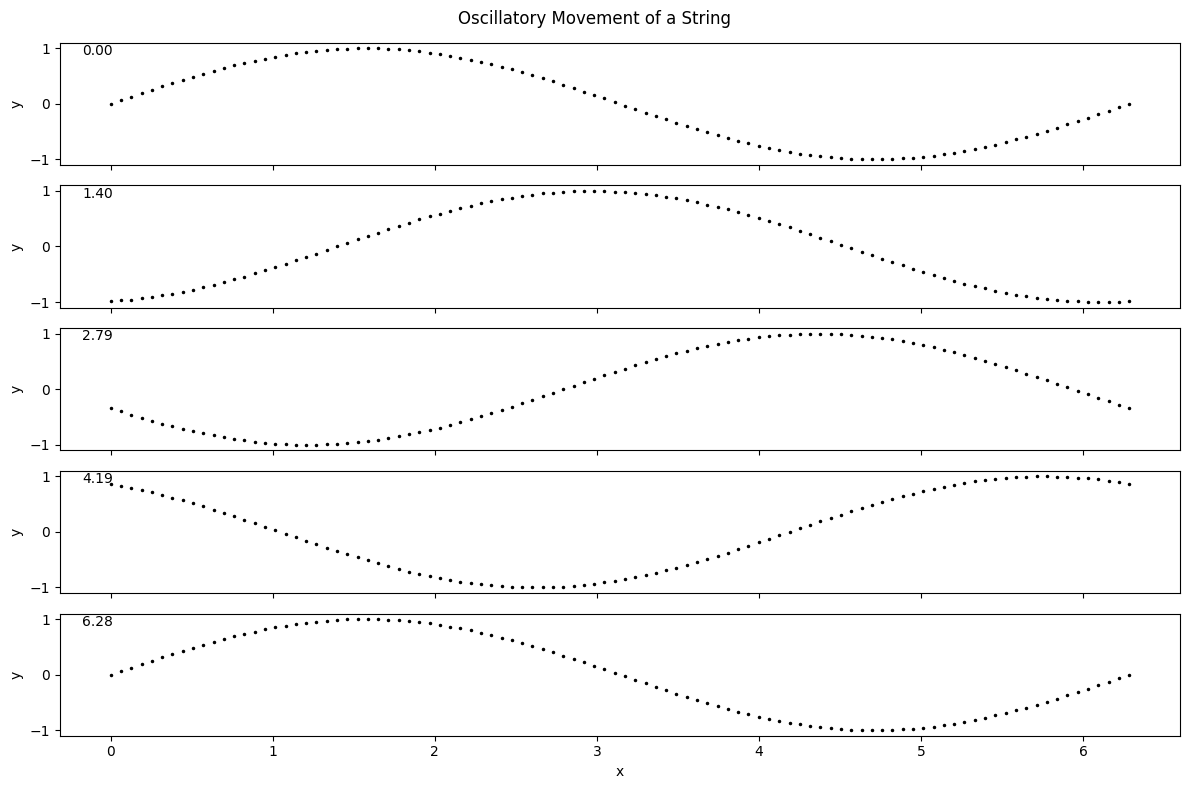

In [58]:
# 2. Make a subplot of the oscillatory movement, one time step per subplot.

# I didn't like this one, it is not really clear and can be cumbersome to read and generate properly.
def plot_oscillatory_movement_subplots(
    x, t, Y, xlabel, ylabel, title, savepath, n_plots, instant_show=False
):
    fig, axs = plt.subplots(n_plots, 1, figsize=(12, 8), sharex=True, sharey=True)

    # take and evenly spaced time steps
    time_steps = np.linspace(0, len(t) - 1, n_plots, dtype=int)
    for axis_id, time_id in enumerate(time_steps):
        axs[axis_id].plot(x, Y[time_id, :], "k.", markersize=3)
        if axis_id == n_plots - 1:  # Check if it's the last plot
            axs[axis_id].set_xlabel(xlabel)
        axs[axis_id].set_ylabel(ylabel)
        axs[axis_id].text(
            0.02, 0.90, "{:.2f}".format(t[time_id]), transform=axs[axis_id].transAxes
        )

    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig(savepath)

    if instant_show:
        plt.show()

plot_oscillatory_movement_subplots(
    x,
    t,
    Y,
    "x",
    "y",
    "Oscillatory Movement of a String",
    "../data/images/oscillatory_movement_subplots.png",
    n_plots=5,
    instant_show=True,
)

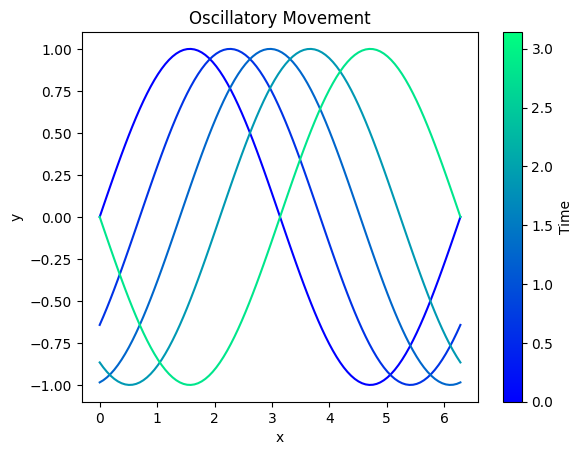

In [73]:
# 3. Make a single plot, and code the time in a color gradient, like a heat map.

# This one is my favorite, it is clear and easy to read, and it is static so it can be easily shared.


def plot_oscillatory_movement_singleplot(
    x, t, Y, xlabel, ylabel, title, savepath, n_plots, instant_show=False
):
    time_steps = np.linspace(0, len(t) - 1, n_plots, dtype=int)

    fig, ax = plt.subplots()
    for i in time_steps:
        ax.plot(x, Y[i, :], c=plt.cm.winter(i / len(t)))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Create a colorbar
    norm = plt.Normalize(vmin=0, vmax=t.max())
    sm = plt.cm.ScalarMappable(cmap=plt.cm.winter, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label("Time")
    plt.savefig(savepath)

    if instant_show:
        plt.show()


plot_oscillatory_movement_singleplot(
    x,
    t,
    Y,
    "x",
    "y",
    "Oscillatory Movement",
    "../data/images/oscillatory_movement_heatmap.png",
    n_plots=5,
    instant_show=True,
)